# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from plotly.offline import init_notebook_mode, iplot  
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})



In [7]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


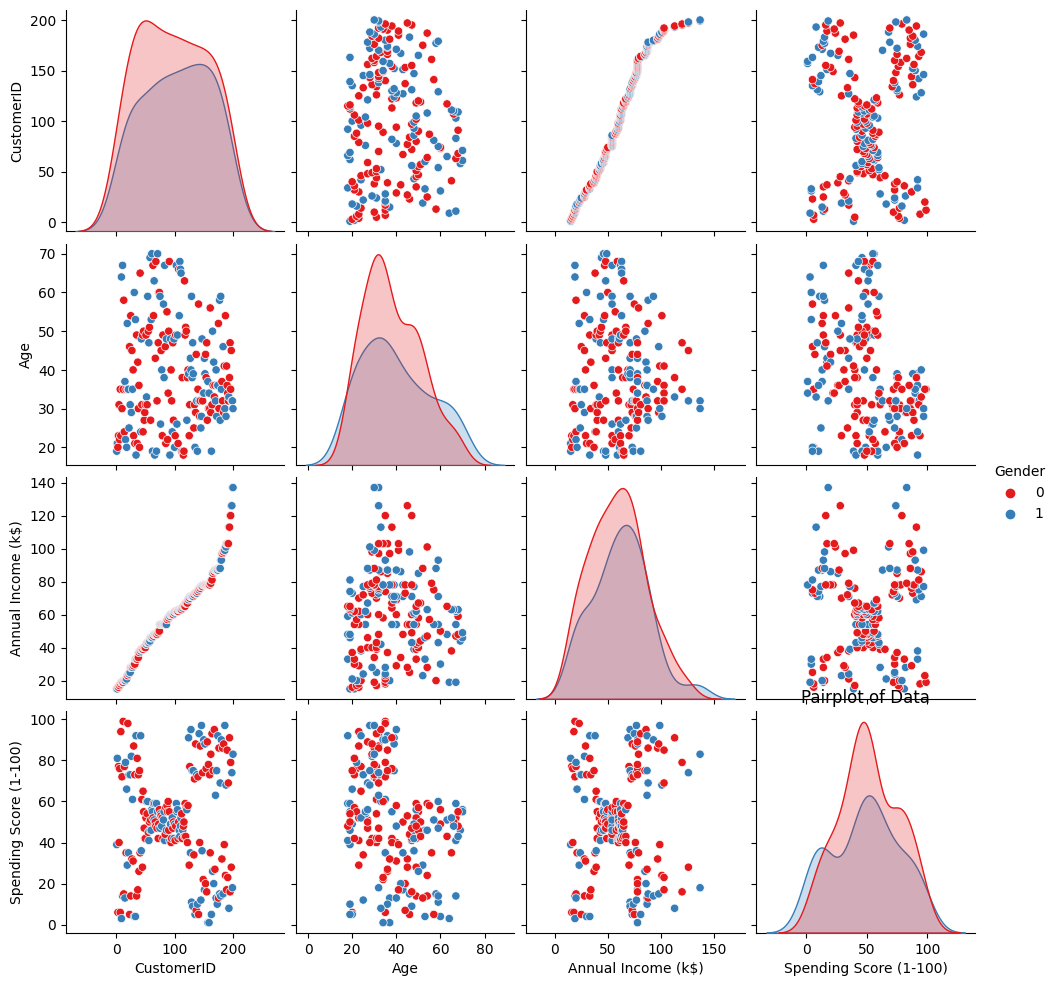

In [8]:
sns.pairplot(data, hue='Gender', kind='scatter', diag_kind='kde', palette='Set1')
plt.title("Pairplot of Data")
plt.show()

In [9]:
data.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


#  Select relevant columns

In [10]:
data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

#  Normalize the data for better clustering performance

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

#  Plot the Dendrogram to determine the optimal number of clusters

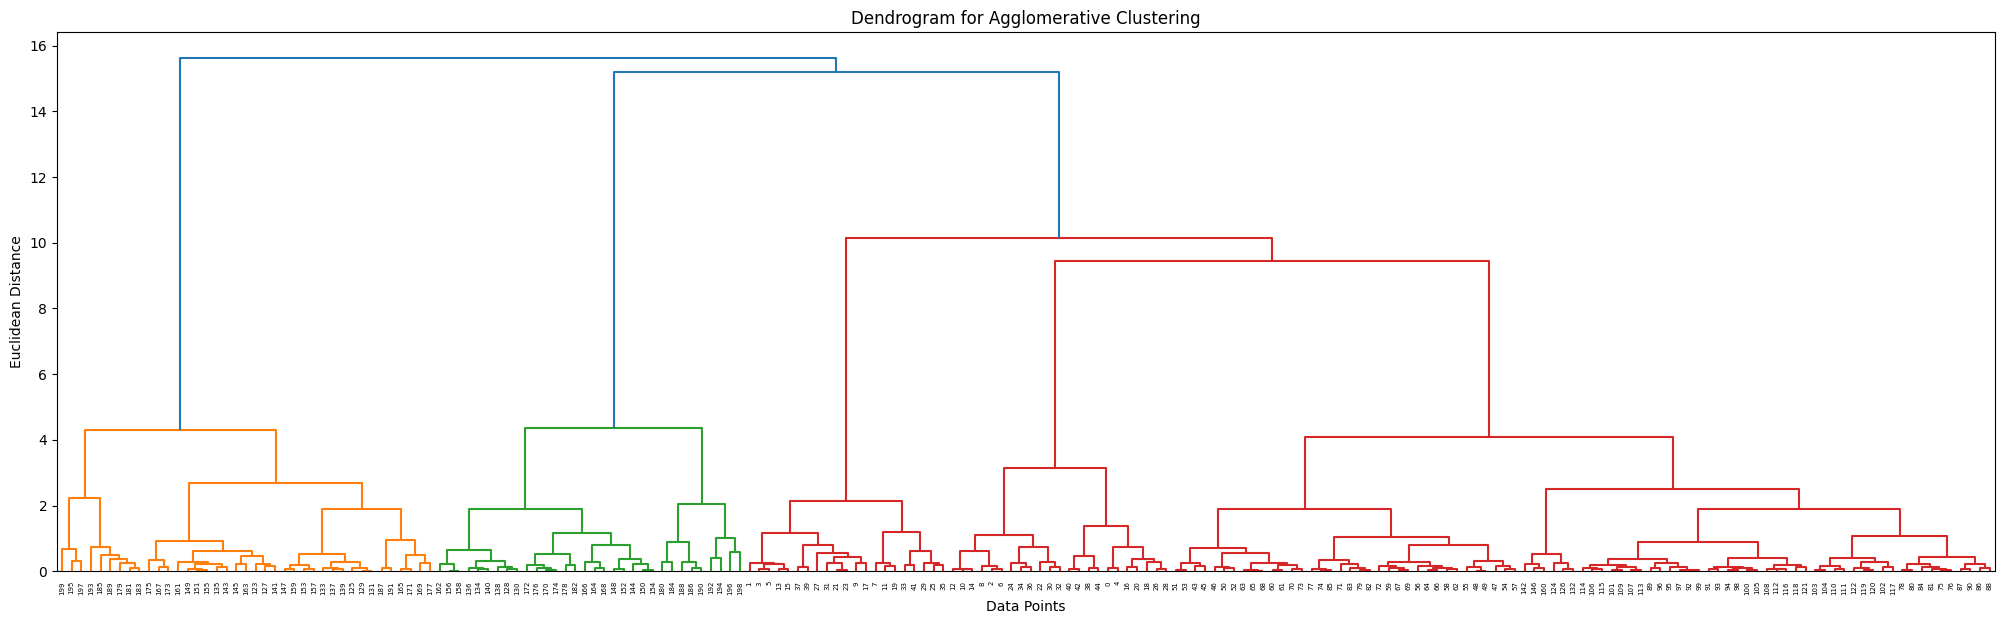

In [12]:
plt.figure(figsize=(25, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

#  Apply Agglomerative Clustering with 5 clusters

In [13]:
agglom = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_agglo = agglom.fit_predict(X)
data.loc[:, 'Labels'] = y_agglo

In [14]:
print(data['Labels'].value_counts())


Labels
2    85
1    39
0    32
4    23
3    21
Name: count, dtype: int64


#  Apply K-Means Clustering and find the optimal number of clusters using the Elbow Method

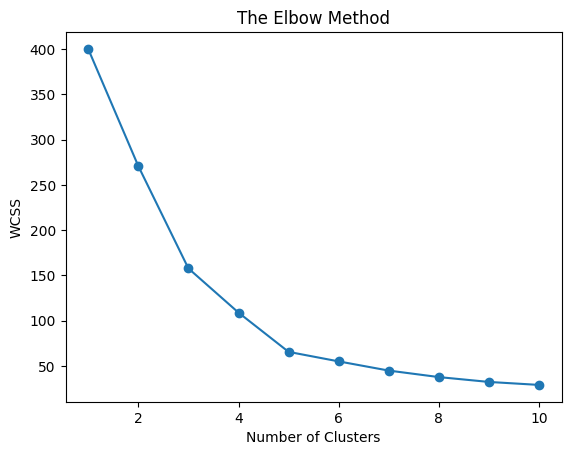

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data['KMeans_Labels'] = y_kmeans


In [17]:
data['KMeans_Labels'].value_counts()


KMeans_Labels
0    81
4    39
1    35
2    23
3    22
Name: count, dtype: int64

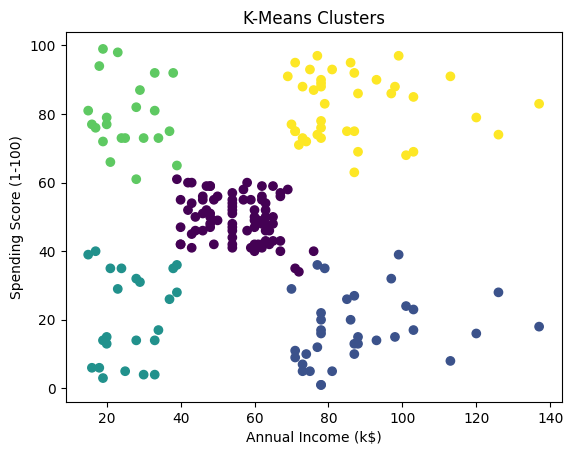

In [18]:
plt.figure()
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['KMeans_Labels'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clusters')
plt.show()


In [19]:
data.head()

,Annual Income (k$),Spending Score (1-100),Labels,KMeans_Labels
0,15,39,4,2
1,15,81,3,3
2,16,6,4,2
3,16,77,3,3
4,17,40,4,2


# Apply DBSCAN Clustering

In [36]:
db = DBSCAN(eps=9, min_samples=5)
y = db.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])  
data['Labels'] = y

In [37]:
data['Labels'].value_counts()


Labels
 3    88
 4    31
-1    23
 5    23
 0    16
 1    12
 2     7
Name: count, dtype: int64

#  Plot DBSCAN results using Plotly

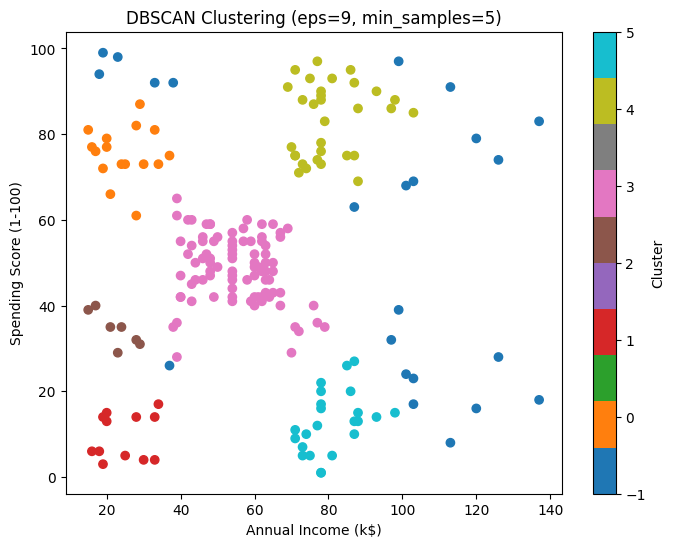

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    data['Annual Income (k$)'], 
    data['Spending Score (1-100)'], 
    c=data['Labels'], cmap='tab10'
)
plt.title('DBSCAN Clustering (eps=9, min_samples=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


#  Compute Silhouette Scores

In [22]:
kmeans_silhouette = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], y_kmeans)
agglomerative_silhouette = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], y_agglo)
dbscan_silhouette = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], y) 
print("Silhouette Score:")
print("K-Means Silhouette Score:", kmeans_silhouette)
print("Agglomerative Clustering Silhouette Score:", agglomerative_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

Silhouette Score:
K-Means Silhouette Score: 0.553931997444648
Agglomerative Clustering Silhouette Score: 0.5529945955148896
DBSCAN Silhouette Score: 0.41673581087761136


#  Visualize Cluster Distribution using Pie Chart 

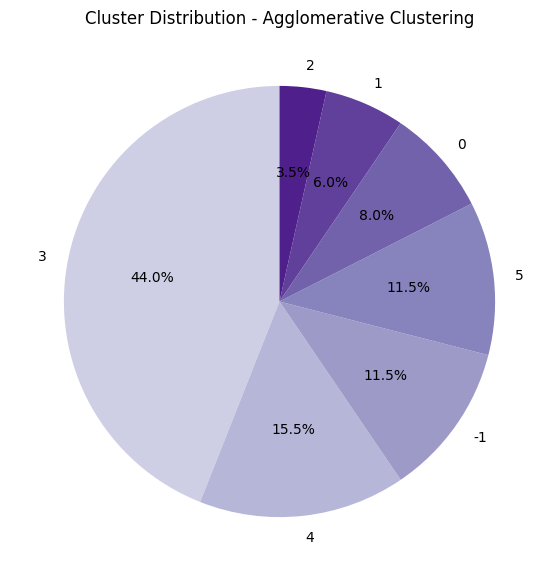

In [43]:
import matplotlib.pyplot as plt
import numpy as np
cluster_counts = data['Labels'].value_counts()
colors = plt.cm.Purples(np.linspace(0.3, 0.9, len(cluster_counts)))
plt.figure(figsize=(7,7))
plt.pie(
    cluster_counts, 
    labels=cluster_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors
)
plt.title('Cluster Distribution - Agglomerative Clustering')
plt.show()

